### Ishaan Mehta E18CSE069 EB02 LabWeek4 Part1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [3]:
# Read the data from local cloud directory
data = pd.read_csv('./obesity_data.csv')

In [5]:
# Add the intercept column with all values 1
data.insert(0, "bias", [1]*len(data), allow_duplicates=True)

In [6]:
# Print some rows just to understand data
data.head(10)

,bias,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,1,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,1,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,1,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,1,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,1,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [7]:
# Perform feature transformation as per the above tasks
encoder = LabelEncoder()

In [8]:
binary = ['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
multi = ['MTRANS', 'NObeyesdad']
multi_butimp = ['CAEC', 'CALC']

In [9]:
for name in binary:
    data[name] = encoder.fit_transform(data[name])
data.head()

,bias,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
data = pd.concat([data,pd.get_dummies(data[multi], prefix=multi)],axis=1)
data.drop(multi, axis=1, inplace=True)
data.head()

,bias,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,1,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,...,0,1,0,0,1,0,0,0,0,0
1,1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,...,0,1,0,0,1,0,0,0,0,0
2,1,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,...,0,1,0,0,1,0,0,0,0,0
3,1,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,...,0,0,1,0,0,0,0,0,1,0
4,1,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,...,0,1,0,0,0,0,0,0,0,1


In [11]:
for name in multi_butimp:
    data[name] = encoder.fit_transform(data[name])
data.head(10)

,bias,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,1,0,21.0,1.62,64.0,1,0,2.0,3.0,2,...,0,1,0,0,1,0,0,0,0,0
1,1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,...,0,1,0,0,1,0,0,0,0,0
2,1,1,23.0,1.80,77.0,1,0,2.0,3.0,2,...,0,1,0,0,1,0,0,0,0,0
3,1,1,27.0,1.80,87.0,0,0,3.0,3.0,2,...,0,0,1,0,0,0,0,0,1,0
4,1,1,22.0,1.78,89.8,0,0,2.0,1.0,2,...,0,1,0,0,0,0,0,0,0,1
5,1,1,29.0,1.62,53.0,0,1,2.0,3.0,2,...,0,0,0,0,1,0,0,0,0,0
6,1,0,23.0,1.50,55.0,1,1,3.0,3.0,2,...,1,0,0,0,1,0,0,0,0,0
7,1,1,22.0,1.64,53.0,0,0,2.0,3.0,2,...,0,1,0,0,1,0,0,0,0,0
8,1,1,24.0,1.78,64.0,1,1,3.0,3.0,2,...,0,1,0,0,1,0,0,0,0,0
9,1,1,22.0,1.72,68.0,1,1,2.0,3.0,2,...,0,1,0,0,1,0,0,0,0,0


In [12]:
col_norm = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'FAF', 'CALC']
scaler = MinMaxScaler()
for name in col_norm:
    data[name] = scaler.fit_transform(data[name].values.reshape(-1,1))
data.head()

,bias,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,1,0,0.148936,0.320755,0.186567,1,0,0.5,0.666667,0.666667,...,0,1,0,0,1,0,0,0,0,0
1,1,0,0.148936,0.132075,0.126866,1,0,1.0,0.666667,0.666667,...,0,1,0,0,1,0,0,0,0,0
2,1,1,0.191489,0.660377,0.283582,1,0,0.5,0.666667,0.666667,...,0,1,0,0,1,0,0,0,0,0
3,1,1,0.276596,0.660377,0.358209,0,0,1.0,0.666667,0.666667,...,0,0,1,0,0,0,0,0,1,0
4,1,1,0.170213,0.622642,0.379104,0,0,0.5,0.000000,0.666667,...,0,1,0,0,0,0,0,0,0,1


In [13]:
# Define X (input features) and y (output feature) 
X = data.iloc[:,[i for i in range(len(data.columns)-7)]].values
y = data.iloc[:,[i for i in range(-7,0)]].values

In [14]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(2111, 21)
y: Type-<class 'numpy.ndarray'>, Shape-(2111, 7)


In [15]:
# Split the dataset into training and testing here
# Use RNADOM STATE parameter as well to reproduce results later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# Print the shape of features and target of training and testing: X_train, X_test, y_train, y_test
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")
assert (X_train.shape[0]==y_train.shape[0] and X_test.shape[0]==y_test.shape[0]), "Check your splitting carefully"

X_train: (1688, 21) , y_train: (1688, 7)
X_test: (423, 21) , y_test: (423, 7)


In [17]:
# DO NOT EDIT ANY VARIABLE OR FUNCTION NAME(S) IN THIS CELL
# Let's try more object oriented approach this time :)
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        '''Initialize variables
        Args:
            learning_rate  : Learning Rate
            max_iterations : Max iterations for training weights
        '''
        # Initialising all the parameters
        self.learning_rate  = learning_rate
        self.max_iterations = max_iterations
        self.losses    = []
        
        # Define epsilon because log(0) is not defined
        self.eps = 1e-7

    def softmax(self, z):
        '''Softmax function
        Args:
            z : A numpy array (num_samples,num_classes)
        Returns:
            A numpy array where softmax function applied to every sample
        '''
        assert len(z.shape) == 2
        
        ### START CODE HERE
        soft_z = (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T
        ### END CODE HERE
        
        return soft_z
    
    def cross_entropy_loss(self, y_true, y_pred):
        '''Compute cross_entropy_loss
        Args:
            y_true : Numpy array of actual truth values (num_samples,num_classes)
            y_pred : Numpy array of predicted values (num_samples,num_classes)
        Returns:
            Cross-entropy loss, scalar value (sum of cross entropy loss of individual classes)
        '''
        # Fix 0/1 values in y_pred so that log is not undefined
        y_pred = np.maximum(np.full(y_pred.shape, self.eps), np.minimum(np.full(y_pred.shape, 1-self.eps), y_pred))
        
        ### START CODE HERE
        # HINT: Take sum of losses of all classes
        ce_loss = np.mean(-np.sum(np.log(y_pred)*y_true, axis=1))
        ### END CODE HERE
        
        return ce_loss
    
    def fit(self, X, y):
        '''Trains logistic regression model using gradient ascent
        to gain maximum likelihood on the training data
        Args:
            X : Numpy array (num_examples, num_features)
            y : Numpy array (num_examples, num_classes)
        Returns: VOID
        '''
        
        num_examples = X.shape[0]
        num_features = X.shape[1]
        num_classes  = y.shape[1]
        
        ### START CODE HERE
        
        # Initialize weights with appropriate shape [num_features, num_classes]
        self.weights = np.zeros((num_features, num_classes))
        
        # Perform gradient ascent
        for i in range(self.max_iterations):
            # Define the linear hypothesis(z) first
            z = X@self.weights
            # Output probability values using softmax
            y_pred = softmax(z)
            # Compute gradient for weights assiciated with each class 
            gradient = ((1/num_examples)*X.T) @ (y_pred -  y)
            # Update the weights
            # Perform weight updation for each class
            self.weights = self.weights - gradient
            
            # Calculate loss
            loss = self.cross_entropy_loss(y, y_pred)
            self.losses.append(loss)
    
        ### END CODE HERE
    
    def predict_proba(self, X):
        '''Predict probabilities for given X.
        Remember sigmoid returns value between 0 and 1.
        Args:
            X : Numpy array (num_samples, num_features)
        Returns:
            probabilities: Numpy array (num_samples,num_classes)
        '''
        if self.weights is None:
            raise Exception("Fit the model before prediction")
        
        ### START CODE HERE
        z = X@self.weights
        probabilities = self.softmax(z)
        ### END CODE HERE
        
        return probabilities
    
    def predict(self, X):
        '''Predict/Classify X in classes
        Args:
            X         : Numpy array (num_samples, num_features)
        Returns:
            binary_predictions : Numpy array (num_samples, num_classes)
        '''
        
        ### START CODE HERE
        # HINT: Choose maximum probability (Set value to 1 and rest 0) to predict binary values using np.argmax() function
        preds = self.predict_proba(X)
        max_indexes = np.argmax(preds, axis = 1)
        binary_predictions = np.zeros(preds.shape)
        count = 0
        for m in binary_predictions:
            m[max_indexes[count]] = 1
            count+=1
        
        ### END CODE HERE
        
        return binary_predictions

In [18]:
def softmax(z):
        '''Softmax function
        Args:
            z : A numpy array (num_samples,num_classes)
        Returns:
            A numpy array where softmax function applied to every sample
        '''
        assert len(z.shape) == 2
        
        ### START CODE HERE
        
        top = np.exp(z)
        bottom = np.sum(top, axis=1).reshape((-1,1))
        t = np.exp(z - np.max(z))
        soft_z = t/np.sum(t)
        return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T
a = np.array([[3,5,8],[5,8,9]])    
r = softmax(a)
print(r)
t = np.zeros((2,3))
i = np.argmax(r, axis = 1)
c = 0
for u in t:
    u[i[c]] = 1
    c+=1
print(t)

[[0.00637746 0.04712342 0.94649912]
 [0.01321289 0.26538793 0.72139918]]
[[0. 0. 1.]
 [0. 0. 1.]]


In [19]:
# Now initialize multinomial logitic regression implemented by you
model = MyLogisticRegression(learning_rate=0.5, max_iterations=1000)
# And now fit on training data
model.fit(X_train, y_train)

In [20]:
# Train log-likelihood
train_loss = model.cross_entropy_loss(y_train, model.predict_proba(X_train))
print("Loss on training data:", train_loss)

Loss on training data: 0.8212968557741279


In [21]:
# Test log-likelihood
test_loss = model.cross_entropy_loss(y_test, model.predict_proba(X_test))
print("Loss on testing data:", test_loss)

Loss on testing data: 0.8284295006426572


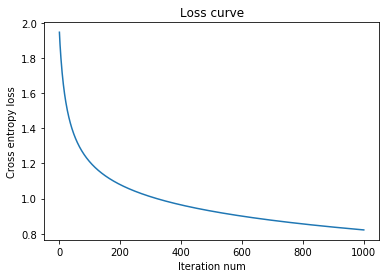

In [22]:
# Plot the loss curve
plt.plot([i+1 for i in range(len(model.losses))], model.losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Cross entropy loss")
plt.show()

In [23]:
def accuracy(y_true,y_pred):
    '''Compute accuracy.
    Accuracy = (Correct prediction / number of samples)
    Args:
        y_true : Truth binary values (num_examples, num_classes)
        y_pred : Predicted binary values (num_examples, num_classes)
    Returns:
        accuracy: scalar value
    '''
    
    ### START CODE HERE
    assert y_true.shape == y_pred.shape , 'Incorrect input'
    n_sample = y_true.shape[0]
    c_pred = 0
    for i in range(n_sample):
        if (y_true[i] == y_pred[i]).all():
            c_pred+=1
    accuracy = c_pred/n_sample
    ### END CODE HERE
    return accuracy

In [24]:
# Print accuracy on train data
accuracy(y_train, model.predict(X_train))

0.7239336492890995

In [25]:
# Print accuracy on test data
accuracy(y_test, model.predict(X_test))

0.7115839243498818

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
# Perform data loading and preprocessing here suitable for sklearn model
# See above note in tasks to minimize implementation errors

data_new = pd.read_csv('./obesity_data.csv')

for name in data_new.columns:
    if data_new[name].dtype != 'int64' and data_new[name].dtype != 'float64':
        data_new[name] = encoder.fit_transform(data_new[name])
for name in col_norm+['MTRANS']:
    data_new[name] = scaler.fit_transform(data_new[name].values.reshape(-1,1))
data_new.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,0.148936,0.320755,0.186567,1,0,0.5,0.666667,0.666667,0,2.0,0,0.000000,1.0,1.000000,0.75,1
1,0,0.148936,0.132075,0.126866,1,0,1.0,0.666667,0.666667,1,3.0,1,1.000000,0.0,0.666667,0.75,1
2,1,0.191489,0.660377,0.283582,1,0,0.5,0.666667,0.666667,0,2.0,0,0.666667,1.0,0.333333,0.75,1
3,1,0.276596,0.660377,0.358209,0,0,1.0,0.666667,0.666667,0,2.0,0,0.666667,0.0,0.333333,1.00,5
4,1,0.170213,0.622642,0.379104,0,0,0.5,0.000000,0.666667,0,2.0,0,0.000000,0.0,0.666667,0.75,6


In [28]:
# Define X and y
X_s = data_new.drop('NObeyesdad', axis = 1).values
y_s = data_new.NObeyesdad.values

In [29]:
# Use the SAME TEST SIZE AND RANDOM STATE as above splitting to compare right
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.20, random_state=22)

In [30]:
# Initialize the model from sklearn
sk_model = LogisticRegression(multi_class="multinomial", max_iter=10000)

In [31]:
# Fit the model
sk_model.fit(X_s_train, y_s_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
# Predict on testing set X_test
y_s_pred = sk_model.predict(X_s_test)

In [33]:
# Print Accuracy on testing set
test_accuracy_sklearn = accuracy_score(y_s_test, y_s_pred)

print(f"\nAccuracy on testing set: {test_accuracy_sklearn}")


Accuracy on testing set: 0.7541371158392435
